## 1. Scrape the data from seeking alpha. 
 * Specially, we meet the IP limitation problem when scraping data frequentely. Then we use different methods to avoid the robot verification, which is using selenium refresh, program restart and time.sleep and so on.

In [ ]:
from bs4 import BeautifulSoup
import requests
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions 
import pandas as pd
executable_path = 'E:/data/geckodriver' 


driver = webdriver.Firefox(executable_path=executable_path)

import time
import sys
import os
def restart_program():
    python = sys.executable
    os.execl(python, python, * sys.argv)

import os
def check_filename_available(filename):
    n=[0]
    def check_meta(file_name):
        file_name_new=file_name
        if os.path.isfile(file_name):
            file_name_new=file_name[:file_name.rfind('.')]+'_'+str(n[0])+file_name[file_name.rfind('.'):]
            n[0]+=1
        if os.path.isfile(file_name_new):
            file_name_new=check_meta(file_name)
        return file_name_new
    return_name=check_meta(filename)
    return return_name

  
def get_info_from(url):
    df=pd.read_csv('E:/data/urls11.csv', header=0)
    
    urls=list(df.url)
    path = 'E:/data11/'
    a=len([lists for lists in os.listdir(path) if os.path.isfile(os.path.join(path, lists))])
    print(a)
    for url in urls[a:]:
        try:
            driver.get(url)
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            passage=soup.select('#a-body')[0].text
            file_name =soup.select('#a-hd > h1')[0].text
                
            try:
                f = open('E:/data11/'+file_name+'.txt','w',encoding='utf-8')   #把文件保存到哪里
                f.write(passage)
                f.close()
            except FileNotFoundError :
                with open(check_filename_available('E:/data11/error.txt'),'w',encoding='utf-8') as f:
                    f.write(passage)
                    f.close()
            except OSError :
                with open(check_filename_available('E:/data11/error.txt'),'w',encoding='utf-8') as f:
                    f.write(passage)
                    f.close()
            
            time.sleep(1)
            #time.sleep(2+random.randint(0,9))
        except IndexError as e:
            a=random.randint(0,2)
            print(a)
            time.sleep(5)
            func(a)
            

    return "finished"
import random
def func(a):
    if a==1:
        driver.quit()
        restart_program()
    else:
        driver.refresh()
    return a
        
print(get_info_from('https://seekingalpha.com'))


## 2. Process the stock price data(2007-2018) and create y label
 * Half of data is from the professor and half is from the yahoo 
 * Calculate the everyday price condition using the deviation based on the historical data.
 * Get a random sample around 728 companies. Put the tickers in a list.

In [ ]:
import datetime
from datetime import timedelta
for i in range(0,data.shape[0]):
    try:
        print(i)
        s=data.loc[i,'ticker']
        a=datetime.datetime.strptime(data['post_time'][i],'%B %d, %Y')
        b=a.year
        
        if (int(b)>=2013) &(int(b)<=2018):
            df=pd.read_csv('/Users/liuziqi/Downloads/2013to2018/out3to2018'+s+'.csv',parse_dates=['date'],index_col = False,header=0,engine='python')
            df['date']=df.apply(lambda row:pd.to_datetime(row['date'],format='%Y/%m/%d'),axis=1)
            q=datetime.datetime(a.year, a.month,a.day)
            ss=q.strftime('%w')
            
            if int(ss)==6:
                qq=q+datetime.timedelta(days=2)
           
            elif int(ss)==5:
                qq=q+datetime.timedelta(days=3)
            
            else:
                qq=q+datetime.timedelta(days=1)
          
            data.loc[i,'y']=df[(df['date']==qq)].values[0][4]
            print(data.loc[i,'y'])
           
    
        elif int(b)<2013:
            df2=pd.read_csv('/Users/liuziqi/Downloads/2007to2012/out7to2012'+s+'.csv',parse_dates=['date'],index_col = False,header=0,engine='python')
            df2['date']=df2.apply(lambda row:pd.to_datetime(row['date'],format='%Y/%m/%d'),axis=1)
            q=datetime.datetime(a.year, a.month,a.day)
            ss=q.strftime('%w')
           
            if int(ss)==6:
                qq=q+datetime.timedelta(days=2)
                data.loc[i,'y']=df2[(df2['date']==qq)].values[0][4]
            elif int(ss)==5:
                qq=q+datetime.timedelta(days=3)
                data.loc[i,'y']=df2[(df2['date']==qq)].values[0][4]
                
            else:
                qq=q+datetime.timedelta(days=1)
                data.loc[i,'y']=df2[(df2['date']==qq)].values[0][4]
        
        else:
        
            from pandas_datareader import DataReader
            import pandas as pd
            
            end=datetime.datetime(a.year, a.month,a.day)
            start=datetime.datetime(a.year-1, a.month,a.day)
           
            stockdata = DataReader(s, 'yahoo', start, end)
           
            stocks = pd.DataFrame({
                       'C': stockdata['Adj Close']
                      })
            
            avg = stocks['C'].mean()
            std = stocks['C'].std()
           
            data.loc[i,'y']=(stocks['C'][-1]-avg)/std
            
    except:
        print("error:",i)
        data.loc[i,'y']=0
        
print("finished")



## 3. Process the text data
 * Generate the dataframe contains (time, ticker, company, quarter, year, post_time, text)
 * Get QA part

In [ ]:
#dataframe
import re,glob,errno,os
import pandas as pd 
import numpy as np

#Creating dataFrame
def dataFrame(data_path):
    data=None
    text=[]
    files=glob.glob(data_path)
    for file in files:
        try:
            with open(file,encoding="utf8") as f:
                text.append(f.read())            
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise     
    text=[i.replace('  ',' ') for i in text if len(i)>5*1024]
   
    ticker=[re.search(r'([A-Z]+)[)]|$',t).group().split(')')[0] for t in text]
    
    Quarter=[re.search(r'[Q|q]([0-9]{1})\s|$',q).group().split('Q')[-1] \
              if len(re.findall(r'[F](\d+)[Q][0|1]|$',q)[0])==0 \
              else re.findall(r'[F](\d+)[Q][0|1]|$',q)[0] \
              for q in text]
    
    year=[re.search(r'([0-9]{4})|$',y).group() \
          if len(re.findall(r'[F](\d+)[Q][0|1]|$',y)[0])==0 \
          else '20'+re.findall(r'[Q]([0-9]{2})',y)[0] for y in text]
    
    post_time=[re.search(r'([A-Z][a-z]+)\s(\d+)[,] ([0-9]{4})|$',t).group() for t in text]
    
    data=pd.DataFrame({'ticker':ticker,'quarter':Quarter,'year':year,\
                       'post_time':post_time,'text':text})
    return data

data_path = 'C:/Users/EMMA/Desktop/project/*.txt'

#processing data
df1=dataFrame(data_path)
all_tickers=pd.read_csv(r'C:\Users\EMMA\Desktop\project\names.csv')

df1= df1[(df1.ticker.map(len)>0)&(df1.ticker.map(len)>0)&\
       (pd.to_numeric(df1['year'])>2000)&(pd.to_numeric(df1['year'])<2020)&\
      (pd.to_numeric(df1['quarter'])<5)&(pd.to_numeric(df1['quarter'])>0)&\
      (df1.post_time.map(len)>0)]

df1["ticker"]=df1["ticker"].apply(lambda t: t if t in all_tickers.name.values.tolist() else np.nan)
df1=df1.dropna().sort_values('year', ascending=True).drop_duplicates('text').sort_index().reset_index(drop=True)#delete duplicates
df1
df1.to_csv(r'C:\Users\EMMA\Desktop\project\660.csv')


In [ ]:
#QA
import re
QA=[] 
for q in df.text.values.tolist():
    if re.search(r'(question|questions)[-\s](and)[-\s](answer|answers)',q.lower()):
        if len(re.split(r'(question|questions)[-\s](and)[-\s](answer|answers)',q.lower(),1)[-1])>800:
            QA.append(re.split(r'(question|questions)[-\s](and)[-\s](answer|answers)',q.lower(),1)[-1]) 
        else: 
            print(q)
            QA.append(0)
            
    elif re.search(r'(operator|operators|operation|operations)[\s](instructions)',q.lower()):
         QA.append(re.split(r'(operator|operators|operation|operations)[\s](instructions)',q.lower(),1)[-1])
   
    elif 'this commentary was prerecorded' in q.lower() and len(q.lower().split('this commentary was prerecorded',1)[-1])>1500:        
        QA.append(q.lower().split('this commentary was prerecorded',1)[-1])

    elif 'with that brief overview' in q.lower() and len(q.lower().split('with that brief overview',1)[-1])>1500:
        QA.append(q.lower().split('with that brief overview',1)[-1])
       
    else:
       
        QA.append(0)
df.loc[:,'QA']=pd.Series(QA)
df=df[df.QA!=0]

In [ ]:
#onehot coding
n_columns = "industry"
dummy_df = pd.get_dummies(data[n_columns])# 用get_dummies进行one hot编码
data = pd.concat([data, dummy_df], axis=1) 

In [ ]:
#data cal
df=data
df['positive_negative']= (df['positivetotal']-df['negativetotal'])/(df['positivetotal']+df['negativetotal'])
df['strong_weak']=(df['strongtotal']-df['weaktotal'])/(df['strongtotal']+df['weaktotal'])
df['active_passive']=(df['activetotal']-df['passivetotal'])/(df['activetotal']+df['passivetotal'])
df['overstated_understated']=(df['overstatedtotal']-df['understatedtotal'])/(df['overstatedtotal']+df['understatedtotal'])
df.y=df.y.apply(lambda i: 0 if abs(i)<=2 else 1)

## Finally, after the data processing and varible creating above, we got the data file we used for the EDA analysis and two models (tf-idf and lexicon) as follows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv("/Users/liuziqi/Downloads/abc.csv",header=0)
data.head()

,Unnamed: 0,ticker,quarter,year,post_time,industry,QA,wordtotal,positivetotal,negativetotal,...,weaktotal,activetotal,passivetotal,overstatedtotal,understatedtotal,y,positive_negative,strong_weak,active_passive,overstated_understated
0,0,ACET,1,2019,10-Nov-18,"Transportation Communications,Electric,Gas,AND...",session\noperator\nthank you. [operator instr...,3051,184,31,...,47,75,60,59,35,0,0.711628,-0.678571,0.111111,0.255319
1,1,ACET,4,2018,28-Sep-18,"Transportation Communications,Electric,Gas,AND...","session\noperator\nall right, thank you. we w...",2550,167,18,...,38,73,46,51,27,0,0.805405,-0.407407,0.226891,0.307692
2,2,ACET,2,2010,5-Feb-10,"Transportation Communications,Electric,Gas,AND...",session. please note that this conference is ...,2568,149,18,...,19,81,36,60,23,0,0.784431,-0.357143,0.384615,0.445783
3,3,ACET,1,2010,6-Nov-09,"Transportation Communications,Electric,Gas,AND...",session\noperator\n(operator instructions) yo...,2359,130,18,...,26,132,27,49,44,0,0.756757,-0.444444,0.660377,0.053763
4,4,ACET,4,2015,11-Sep-15,"Transportation Communications,Electric,Gas,AND...",session. please note the conference is being ...,2631,216,27,...,19,84,36,132,19,1,0.777778,-0.310345,0.400000,0.748344


In [2]:
data.columns

Index(['Unnamed: 0', 'ticker', 'quarter', 'year', 'post_time', 'industry',
       'QA', 'wordtotal', 'positivetotal', 'negativetotal', 'strongtotal',
       'weaktotal', 'activetotal', 'passivetotal', 'overstatedtotal',
       'understatedtotal', 'y', 'positive_negative', 'strong_weak',
       'active_passive', 'overstated_understated'],
      dtype='object')

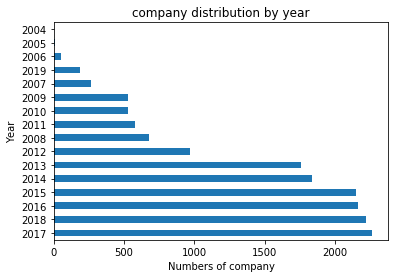

In [3]:
#EDA 
#company distribution by year
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
ax=data.year.value_counts().\
   plot.barh(figsize=(6,4), title="company distribution by year");
ax.set(ylabel="Year", xlabel="Numbers of company");

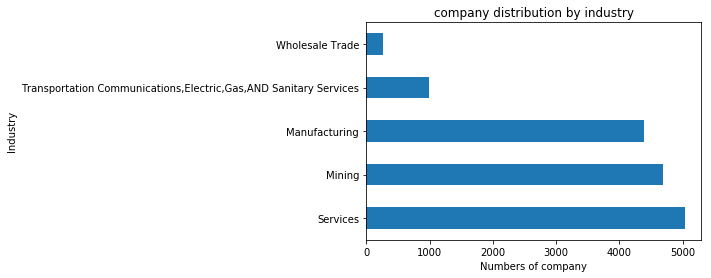

In [4]:
#EDA 
#company distribution by industry
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ax=data.industry.value_counts().\
   plot.barh(figsize=(6,4), title="company distribution by industry");
ax.set(ylabel="Industry", xlabel="Numbers of company");

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv("/Users/liuziqi/Downloads/newdata.csv",header=0)
data.head()
grouped= data.groupby('year')
grouped['y'].agg([  np.mean, np.std, np.max,np.min])[2:]

,mean,std,amax,amin
year,,,,
2006,0.159895,0.930352,4.163187,-1.965658
2007,-0.399745,1.424652,2.945849,-4.037391
2008,-0.981396,1.358163,3.799068,-4.756597
2009,0.206882,1.146786,3.840134,-3.272727
2010,0.757857,1.307927,4.707826,-4.662111
2011,0.160347,1.417022,3.915956,-4.023944
2012,0.302577,1.449928,4.560260,-5.212494
2013,0.630762,1.497434,5.471059,-6.703522
2014,0.272796,1.489563,7.474048,-5.478321


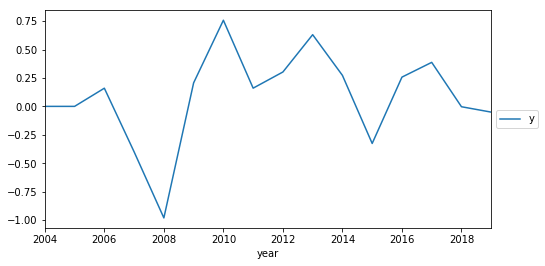

In [6]:
data.groupby('year')["y"].mean()\
.plot(kind='line', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## 4. EDA
 * Generate the dataframe contains (time, ticker, company, quarter, year, post_time, text)

In [33]:

from IPython.core.interactiveshell import InteractiveShell
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import string
import nltk
import re


InteractiveShell.ast_node_interactivity = "all"
def tokenize(doc, lemmatized=False, no_stopword=False): 
    tokens =[]
    stop_words = stopwords.words('english')
    original_tokens=nltk.regexp_tokenize(doc.lower(),r'\w[\w\'-]*\w')      
    if lemmatized==False:
        if no_stopword==False:
            tokens = original_tokens
        else: 
            tokens =[word for word in  original_tokens if word not in stop_words]               
    else:
        if no_stopword==True:
            wordnet_lemmatizer = WordNetLemmatizer()
            tokens = []
            for word in original_tokens:
                tokens_lemmatized=wordnet_lemmatizer.lemmatize(word)
                tokens.append(tokens_lemmatized)
            tokens =[word for word in  tokens if word not in stop_words]   
        else:
            wordnet_lemmatizer = WordNetLemmatizer()
            tokens = []
            for word in original_tokens:
                tokens_lemmatized=wordnet_lemmatizer.lemmatize(word)
                tokens.append(tokens_lemmatized)  
    return tokens
data=pd.read_csv("/Users/liuziqi/Downloads/abc.csv",header=0)

docs=data.QA.tolist()
all_tokens=[]
for doc in docs:
    tokens=tokenize(doc,True,True)
    all_tokens+=tokens
new_tokens=[i for i in all_tokens if re.sub(r'\D','',i)==""]

In [34]:
print(new_tokens[0:10])
print(len(new_tokens))

['session', 'operator', 'thank', 'operator', 'instruction', 'first', 'question', 'matt', 'hewitt', 'craig-hallum']
36496023


In [35]:
# get the most frequent items
from nltk.corpus import stopwords
import string
#stop=['look','company','line','get','term','that\'s','come','go','number','we\'ve','know','thing','bit','today','thanks','per','say','two']
word_dist=nltk.FreqDist(new_tokens)
#get the most frequent items
common_30=word_dist.most_common(30)
common_30=list(list(zip(*common_30))[0])
print(common_30)
stop=['wa','company','u','we\'re','ha']
final_tokens=[token for token in new_tokens if token not in stop]
word_dist1=nltk.FreqDist(final_tokens)
top_20=word_dist1.most_common(20) 

['quarter', 'year', 'think', 'million', 'wa', 'question', 'business', 'going', 'market', 'would', 'u', 'well', 'first', 'growth', 'see', 'one', "we're", 'good', 'revenue', 'operator', 'like', 'next', 'new', 'thank', 'really', 'last', 'also', 'look', 'sale', 'ha']


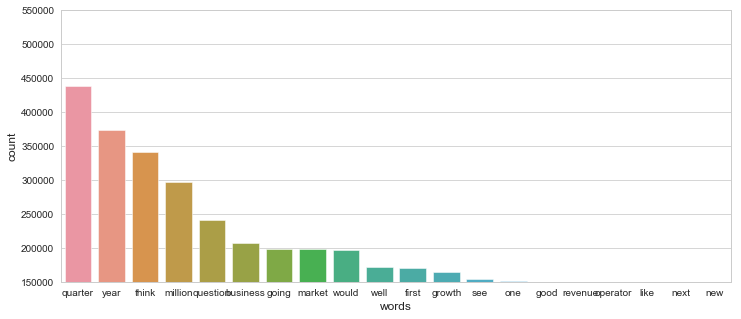

In [36]:
#  top_20 words barchart
new_df=pd.DataFrame(list(top_20),columns=['words', 'count']) 
sns.set_style("whitegrid");
plt.figure(figsize=(12,5));
plt.ylim(150000,550000)
sns.barplot(x='words',y='count', data=new_df);
plt.show();   


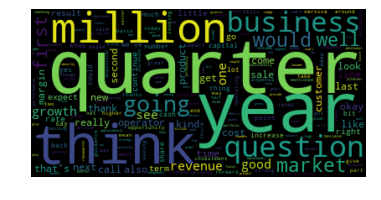

In [37]:
#word cloud words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(word_dist1)
plt.figure();
plt.imshow(wordcloud, interpolation="bilinear");
plt.axis("off");
plt.show();    

Text(0.5, 1.0, 'Most frequently occurring')

(-0.5, 999.5, 499.5, -0.5)

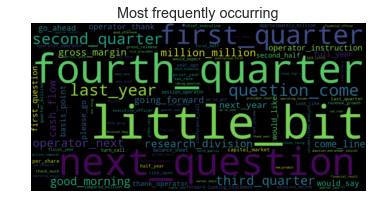

In [38]:
##Word Cloud of Bigrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder 
from operator import itemgetter

# setup and score the bigrams using the raw frequency.
finder = BigramCollocationFinder.from_words(final_tokens)
bigram_measures = BigramAssocMeasures()
scored = finder.score_ngrams(bigram_measures.raw_freq)
scoredList = sorted(scored, key=itemgetter(1), reverse=True)
word_dict = {}
listLen = len(scoredList)
# Get the bigram and make a contiguous string for the dictionary key. 
for i in range(listLen):
    word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.

wordCloud1 = WordCloud(max_words=100, height=500, width=1000).generate_from_frequencies(word_dict)
plt.title('Most frequently occurring')
plt.imshow(wordCloud1, interpolation='bilinear')
plt.axis("off")

In [39]:
new_tokens=list(set(final_tokens))
with open("/Users/liuziqi/Documents/project/positive.txt",'r') as f:
    positive_words=[line.strip().lower() for line in f]
positive_tokens=[token for token in new_tokens                  if token in positive_words]
a=len(positive_tokens)

In [40]:
with open("/Users/liuziqi/Documents/project/negative.txt",'r') as f:
    negative_words=[line.strip().lower() for line in f]
negative_tokens=[token for token in new_tokens                 if token in negative_words]
b=len(negative_tokens)

In [41]:
with open("/Users/liuziqi/Documents/project/strong.txt",'r') as f:
    strong_words=[line.strip().lower() for line in f]
strong_tokens=[token for token in new_tokens                  if token in strong_words]
c=len(strong_tokens)
c
with open("/Users/liuziqi/Documents/project/weak.txt",'r') as f:
    weak_words=[line.strip().lower() for line in f]
weak_tokens=[token for token in new_tokens                  if token in weak_words]
d=len(weak_tokens)
d


137

417

In [44]:
with open("/Users/liuziqi/Documents/project/active.txt",'r') as f:
    active_words=[line.strip().lower() for line in f]
active_tokens=[token for token in new_tokens                  if token in active_words]
e=len(active_tokens)
e
with open("/Users/liuziqi/Documents/project/passive.txt",'r') as f:
    passive_words=[line.strip().lower() for line in f]
    
passive_tokens=[token for token in new_tokens                  if token in passive_words]
i=len(passive_tokens)
i  
    
    


817

394

In [45]:
with open("/Users/liuziqi/Documents/project/overstated.txt",'r') as f:
    over_words=[line.strip().lower() for line in f]
over_tokens=[token for token in new_tokens                  if token in over_words]
g=len(over_tokens)
g
with open("/Users/liuziqi/Documents/project/understated.txt",'r') as f:
    under_words=[line.strip().lower() for line in f]
under_tokens=[token for token in new_tokens                  if token in under_words]
h=len(under_tokens)
h


385

170

In [46]:
data = {'Positive':a, 'Negative':b,'Strong':c,'Weak':d,'Active':e,'Passive':i,'Overstated':g,'Understated':h} 
data


{'Positive': 1247,
 'Negative': 146,
 'Strong': 137,
 'Weak': 417,
 'Active': 817,
 'Passive': 394,
 'Overstated': 385,
 'Understated': 170}

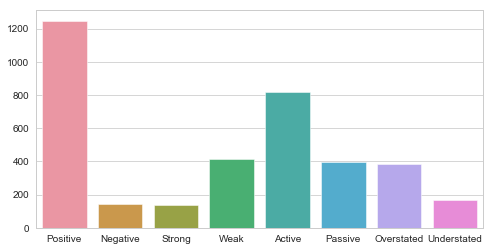

In [47]:
df = pd.DataFrame(data,index =['1'])  
df 
plt.figure(figsize=(8,4));
sns.barplot(data=df);
plt.show();

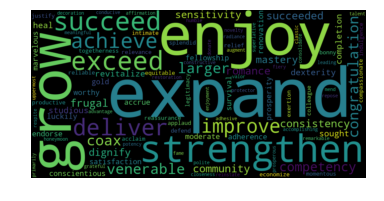

In [48]:
#word cloud of positive_word
positive_string=' '.join(positive_tokens)
wordcloud2 = WordCloud(max_words=100, height=500, width=1000).generate(positive_string);
plt.figure();
plt.imshow(wordcloud2, interpolation="bilinear");
plt.axis("off");
plt.show();


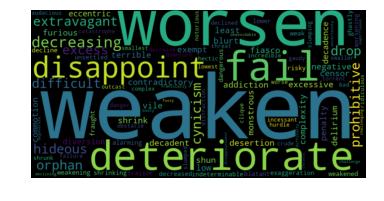

In [49]:
#word cloud of Negative_word
negative_string=' '.join(negative_tokens)
wordcloud3 = WordCloud(max_words=100, height=500, width=1000).generate(negative_string);
plt.figure();
plt.imshow(wordcloud3, interpolation="bilinear");
plt.axis("off");
plt.show();


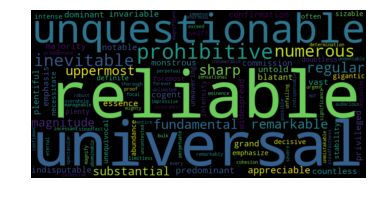

In [50]:
#word cloud of strong_word
strong_string=' '.join(strong_tokens)
wordcloud4 = WordCloud(max_words=100, height=500, width=1000).generate(strong_string);
plt.figure();
plt.imshow(wordcloud4, interpolation="bilinear");
plt.axis("off");
plt.show();



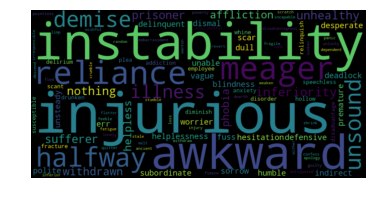

In [51]:
#word cloud of weak_word
weak_string=' '.join(weak_tokens)
wordcloud5 = WordCloud(max_words=100, height=500, width=1000).generate(weak_string);
plt.figure();
plt.imshow(wordcloud5, interpolation="bilinear");
plt.axis("off");
plt.show();

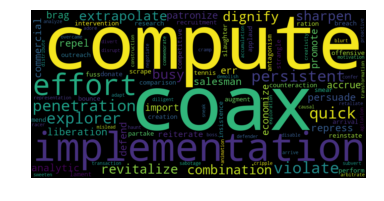

In [52]:
#word cloud of active_word
active_string=' '.join(active_tokens)
wordcloud6 = WordCloud(max_words=100, height=500, width=1000).generate(active_string);
plt.figure();
plt.imshow(wordcloud6, interpolation="bilinear");
plt.axis("off");
plt.show();


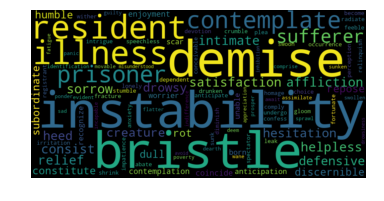

In [53]:
#word cloud of passive_word
passive_string=' '.join(passive_tokens)
wordcloud7 = WordCloud(max_words=100, height=500, width=1000).generate(passive_string);
plt.figure();
plt.imshow(wordcloud7, interpolation="bilinear");
plt.axis("off");
plt.show();


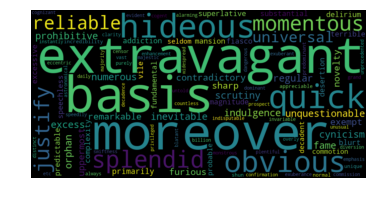

In [54]:
#word cloud of oversated_word
over_string=' '.join(over_tokens)
wordcloud8 = WordCloud(max_words=100, height=500, width=1000).generate(over_string);
plt.figure();
plt.imshow(wordcloud8, interpolation="bilinear");
plt.axis("off");
plt.show();

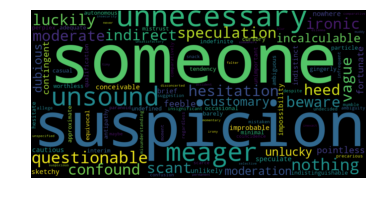

In [55]:
#word cloud of undersated_word
under_string=' '.join(under_tokens)
wordcloud9 = WordCloud(max_words=100, height=500, width=1000).generate(under_string);
plt.figure();
plt.imshow(wordcloud9, interpolation="bilinear");
plt.axis("off");
plt.show();

## 5. TF-IDF Model 


In [7]:
import pandas as pd
textdata=pd.read_csv(r"/Users/liuziqi/Downloads/textdata.csv",header=0)


In [8]:
textdata.head()

,Unnamed: 0,QA,y
0,0,session\noperator\nthank you. [operator instr...,0
1,1,"session\noperator\nall right, thank you. we w...",0
2,2,session. please note that this conference is ...,0
3,3,session\noperator\n(operator instructions) yo...,0
4,4,session. please note the conference is being ...,1


              precision    recall  f1-score   support

           0       0.82      1.00      0.90      3994
           1       0.00      0.00      0.00       859

   micro avg       0.82      0.82      0.82      4853
   macro avg       0.41      0.50      0.45      4853
weighted avg       0.68      0.82      0.74      4853

0.5157354774886427


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


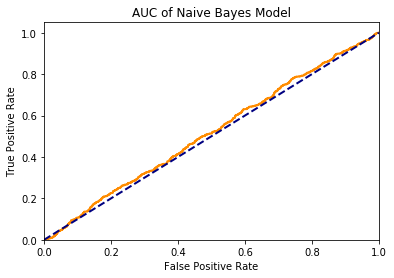

In [9]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
# import method for split train/test data set
from sklearn.model_selection import train_test_split

# import method to calculate metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(textdata.QA, textdata.y, test_size=0.3, random_state=0)
def classify():
    
    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf_vect = TfidfVectorizer(min_df=2,stop_words="english") 
    dtm= tfidf_vect.fit_transform(X_train)
    dtmtest= tfidf_vect.transform(X_test)
  
    clf=MultinomialNB(alpha=5).fit(dtm,y_train)
    predicted=clf.predict(dtmtest)
    print(classification_report (y_test, predicted))
    from sklearn.metrics import roc_curve, auc,precision_recall_curve
    import numpy as np
    predict_p=clf.predict_proba(dtmtest)
    fpr, tpr, thresholds = roc_curve(y_test, predict_p[:,0],                                  pos_label=1)
    print(auc(fpr, tpr))
    from matplotlib import pyplot as plt
    plt.figure();
    plt.plot(fpr, tpr, color='darkorange', lw=2);
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05]);
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.title('AUC of Naive Bayes Model');
    plt.show();

classify()

## 6. Lexicon Model 


In [11]:
import pandas as pd
df=pd.read_csv("/Users/liuziqi/Downloads/alldata.csv",header=0)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('date', axis=1)
df=df.rename(columns = {'Transportation Communications,Electric,Gas,AND Sanitary Services':'others'})
df['positive_negative']= (df['positivetotal']-df['negativetotal'])/(df['positivetotal']+df['negativetotal'])
df['strong_weak']=(df['strongtotal']-df['weaktotal'])/(df['strongtotal']+df['weaktotal'])
df['active_passive']=(df['activetotal']-df['passivetotal'])/(df['activetotal']+df['passivetotal'])
df['overstated_understated']=(df['overstatedtotal']-df['understatedtotal'])/(df['overstatedtotal']+df['understatedtotal'])
df.y=df.y.apply(lambda i: 0 if abs(i)<=2 else 1)

In [12]:
df.columns

Index(['wordtotal', 'positivetotal', 'negativetotal', 'strongtotal',
       'weaktotal', 'activetotal', 'passivetotal', 'overstatedtotal',
       'understatedtotal', 'Manufacturing', 'Mining', 'Services', 'others',
       'Wholesale Trade', 'y', 'vix', 'positive_negative', 'strong_weak',
       'active_passive', 'overstated_understated'],
      dtype='object')

In [13]:
df=df.drop(['wordtotal','positivetotal','negativetotal','strongtotal','weaktotal','activetotal','passivetotal','overstatedtotal','understatedtotal','Manufacturing','Mining','Services','others','Wholesale Trade'],axis=1)

In [14]:
print(df.shape)
df=df.dropna()
print(df.shape)
cols = df.columns.tolist()
cols = cols[1:] + cols[0:1]
df=df[cols]
df.head()

(16175, 6)
(16135, 6)


,vix,positive_negative,strong_weak,active_passive,overstated_understated,y
0,17.36,0.711628,-0.678571,0.111111,0.255319,0
1,12.12,0.805405,-0.407407,0.226891,0.307692,0
2,26.11,0.784431,-0.357143,0.384615,0.445783,0
3,24.19,0.756757,-0.444444,0.660377,0.053763,0
4,23.20,0.777778,-0.310345,0.400000,0.748344,1


In [15]:
# KNN 
X = df[['vix', 'positive_negative', 'strong_weak',
       'active_passive', 'overstated_understated']] 
y = df.y 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  


[[2482  173]
 [ 498   74]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2655
           1       0.30      0.13      0.18       572

   micro avg       0.79      0.79      0.79      3227
   macro avg       0.57      0.53      0.53      3227
weighted avg       0.74      0.79      0.76      3227



In [16]:
classifier.score(X_test, y_test)  
#AUC 

from sklearn.metrics import roc_curve, auc,precision_recall_curve
import numpy as np
X = df[['vix', 'positive_negative', 'strong_weak',
       'active_passive', 'overstated_understated']] 
y = df.y 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  
# We need to get probabilities as predictions
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  
predict_p=classifier.predict_proba(X_test)

# a probability is generated for each label
#labels
predict_p[0:3]
# Ground-truth
y_test[0:3]

# let's just look at one label "soc.religion.christian"
# convert to binary
binary_y = np.where(y_test==1,1,0)

# this label corresponds to last column
y_pred = predict_p[:,-1]

# compute fpr/tpr by different thresholds
# positive class has label "1"
fpr, tpr, thresholds = roc_curve(binary_y, y_pred, \
                                pos_label=1)
# calculate auc
auc(fpr, tpr)

0.813431252357601

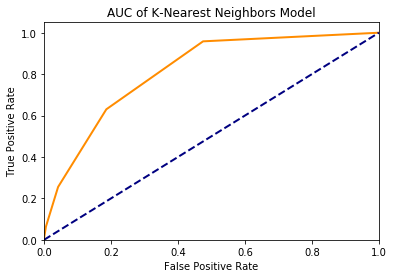

In [17]:
from matplotlib import pyplot as plt
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of K-Nearest Neighbors Model');
plt.show();

In [19]:
# SVM
from sklearn.svm import SVC
X = df[['vix', 'positive_negative', 'strong_weak',
       'active_passive', 'overstated_understated']] 
y = df.y 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  
scaler = StandardScaler()  
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 
clf = SVC(gamma='auto',probability=True)
clf.fit(X_train, y_train)
predicted=clf.predict(X_test)
labels=sorted(data["y"].unique())
# check a few samples
#predicted[0:3]
#y_test[0:3]
print(classification_report\
      (y_test, predicted))
#print(score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2664
           1       0.69      0.02      0.03       563

   micro avg       0.83      0.83      0.83      3227
   macro avg       0.76      0.51      0.47      3227
weighted avg       0.80      0.83      0.75      3227



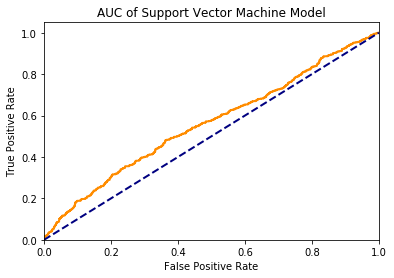

In [20]:
clf.score(X_test, y_test, sample_weight=None)
from sklearn.metrics import roc_curve, auc,precision_recall_curve
import numpy as np

# a probability is generated for each label
#labels
#predict_p[0:3]
# Ground-truth
#y_test[0:3]
#scaler = StandardScaler()  
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test) 
# let's just look at one label "soc.religion.christian"
# convert to binary
binary_y = np.where(y_test==1,1,0)
# We need to get probabilities as predictions
predict_p=clf.predict_proba(X_test)


# this label corresponds to last column
y_pred = predict_p[:,-1]

# compute fpr/tpr by different thresholds
# positive class has label "1"
fpr, tpr, thresholds = roc_curve(binary_y, y_pred, \
                                 pos_label=1)
# calculate auc
auc(fpr, tpr)
from matplotlib import pyplot as plt
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of Support Vector Machine Model');
plt.show();

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Emma\Desktop\alldata.csv",header=0)
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('date', axis=1)
df=df.rename(columns = {'Transportation Communications,Electric,Gas,AND Sanitary Services':'others'})
df['positive_negative']= (df['positivetotal']-df['negativetotal'])/(df['positivetotal']+df['negativetotal'])
df['strong_weak']=(df['strongtotal']-df['weaktotal'])/(df['strongtotal']+df['weaktotal'])
df['active_passive']=(df['activetotal']-df['passivetotal'])/(df['activetotal']+df['passivetotal'])
df['overstated_understated']=(df['overstatedtotal']-df['understatedtotal'])/(df['overstatedtotal']+df['understatedtotal'])
df.y=df.y.apply(lambda i: 0 if abs(i)<=2 else 1)
df.head(10)

,wordtotal,positivetotal,negativetotal,strongtotal,weaktotal,activetotal,passivetotal,overstatedtotal,understatedtotal,Manufacturing,Mining,Services,others,Wholesale Trade,y,vix,positive_negative,strong_weak,active_passive,overstated_understated
0,3051,184,31,9,47,75,60,59,35,0,0,0,1,0,0,17.36,0.711628,-0.678571,0.111111,0.255319
1,2550,167,18,16,38,73,46,51,27,0,0,0,1,0,0,12.12,0.805405,-0.407407,0.226891,0.307692
2,2568,149,18,9,19,81,36,60,23,0,0,0,1,0,0,26.11,0.784431,-0.357143,0.384615,0.445783
3,2359,130,18,10,26,132,27,49,44,0,0,0,1,0,0,24.19,0.756757,-0.444444,0.660377,0.053763
4,2631,216,27,10,19,84,36,132,19,0,0,0,1,0,1,23.20,0.777778,-0.310345,0.400000,0.748344
5,2678,176,30,11,28,96,42,82,30,0,0,0,1,0,0,13.12,0.708738,-0.435897,0.391304,0.464286
6,2165,129,30,8,9,86,32,103,15,0,0,0,1,0,0,12.92,0.622642,-0.058824,0.457627,0.745763
7,1193,80,9,2,14,44,18,29,23,0,0,0,1,0,1,12.90,0.797753,-0.750000,0.419355,0.115385
8,950,46,8,3,7,46,11,16,13,0,0,0,1,0,0,15.29,0.703704,-0.400000,0.614035,0.103448
9,1375,75,4,4,23,56,20,31,27,0,0,0,1,0,1,12.59,0.898734,-0.703704,0.473684,0.068966


In [2]:
#normalize data
import pandas as pd
import numpy as np
data=df[['positive_negative','active_passive','overstated_understated','strong_weak','wordtotal',
       'Manufacturing', 'Mining','Services', 'others', 'Wholesale Trade','vix','y']]
numColumns = data.select_dtypes(include=[np.number]).columns
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)  
imr = imr.fit(data[numColumns])
data[numColumns] = imr.transform(data[numColumns])
col=['positive_negative', 'active_passive', 'overstated_understated',
      'strong_weak', 'wordtotal', 'vix', 'Manufacturing', 'Mining',
       'Services', 'others', 'Wholesale Trade']
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler()
data[col] =sc.fit_transform(data[col]) 

C:\Users\Emma\Anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Emma\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Emma\Anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

11


C:\Users\Emma\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


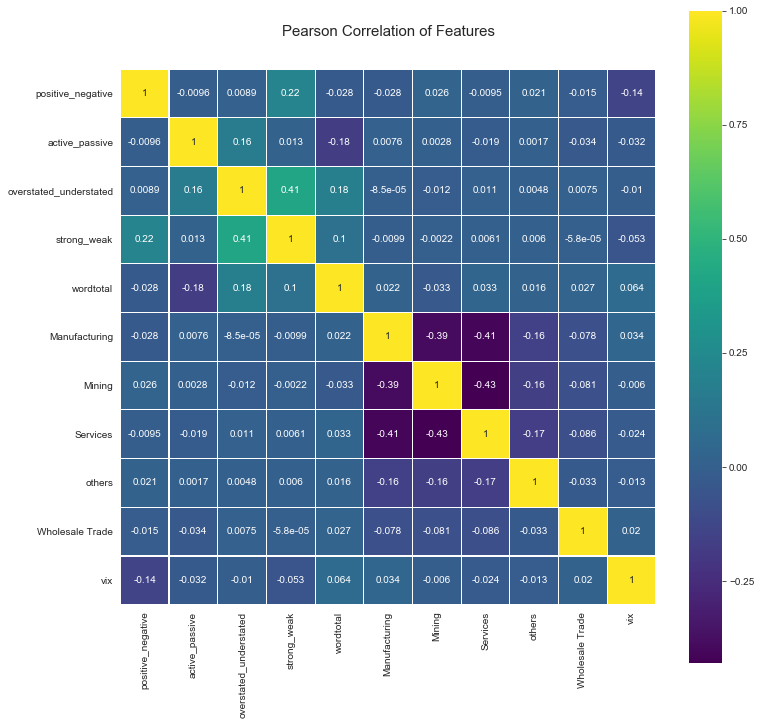

In [5]:
x_feature = list(data.columns)
x_feature.remove('y')
X = data[x_feature].astype(float)
Y = data['y'].astype(float)
print(len(x_feature)) 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 11) 
rfe = rfe.fit(X, Y)

print(rfe.support_)
print(rfe.ranking_) 
import matplotlib.pyplot as plt
plt.style.use('ggplot')  
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
col_filter = X.columns[rfe.support_]
col_new=col_filter
sns.heatmap(data[col_filter].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
names = data[col_new].columns

In [6]:
#split data into two parts, train and test
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
data=data.dropna()
data_x=data.drop('y',axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_x, data['y'], test_size=0.3, random_state=0)

In [7]:
#select features using random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]

C:\Users\Emma\Anaconda3\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('positive_negative', 0.1605163914173265)
('active_passive', 0.16538319589848816)
('overstated_understated', 0.15745603899594146)
('strong_weak', 0.14578787265702856)
('wordtotal', 0.1658065644207853)
('Manufacturing', 0.012296177891604284)
('Mining', 0.011452463578613726)
('Services', 0.012953193295207199)
('others', 0.007359525247764574)
('Wholesale Trade', 0.0024298262467961026)
('vix', 0.15855875035044414)


In [8]:
#build newdata for random forest
x_train=X_train[['positive_negative','active_passive','overstated_understated','strong_weak','wordtotal','vix']]
x_test=X_test[['positive_negative','active_passive','overstated_understated','strong_weak','wordtotal','vix']]


In [ ]:
#tuning parameters fo random forest classifier
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(50, 100, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2,error_score='raise')
# Fit the random search model
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

In [ ]:
#applying selected feature to random forest classifier model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rft_model = RandomForestClassifier(n_jobs=-1,n_estimators=800, min_samples_split=2, min_samples_leaf=1,
                                   max_features='sqrt',max_depth=80,bootstrap=False, criterion='entropy').fit(x_train, y_train)

predictions = rft_model.predict(x_test)
acc_test=accuracy_score(y_test, predictions)
print('test accuracy:',acc_test)

#plot auc of random forest
from sklearn.metrics import auc,roc_curve
predictions = rft_model.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, predictions, \
                                 pos_label=1)
print(auc(fpr, tpr))
from matplotlib import pyplot as plt
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of Random Forest Model');
plt.show();

#recall, precision, f1—score 
from sklearn.metrics import classification_report,confusion_matrix
predictions = rft_model.predict(x_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

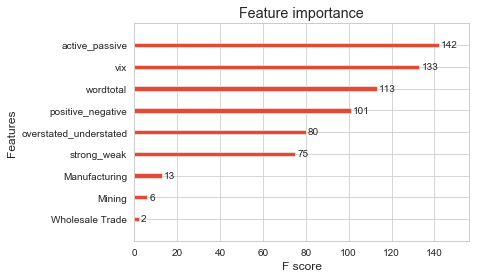

In [29]:
#XGBoost
# plot feature importance using built-in function
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()

In [30]:
#build newdata for XGBoost
x_train=X_train[['positive_negative','active_passive','overstated_understated','strong_weak','wordtotal','vix']]
x_test=X_test[['positive_negative','active_passive','overstated_understated','strong_weak','wordtotal','vix']]

In [ ]:
#select parameter for XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
grid_param= {
    'n_estimators': [300, 500, 800],
    'max_depth':range(8,10),
    'min_child_weight':range(1,3),
    'nthread':[2,4],  
    'scale_pos_weight':0.5}

xgb = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic', gamma=0,subsample=0.8,
                        iid=False),
                        param_grid=grid_param,
                        scoring='accuracy',n_jobs=-1,cv=5).fit(x_train,y_train)
best_parameters = xgb.best_params_
print(best_parameters)

0.7086415420569737


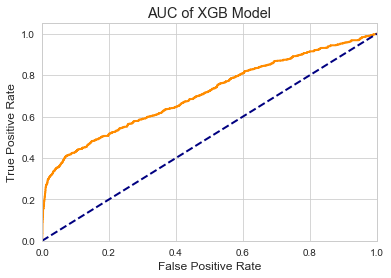

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      3994
         1.0       0.84      0.23      0.37       859

   micro avg       0.86      0.86      0.86      4853
   macro avg       0.85      0.61      0.64      4853
weighted avg       0.85      0.86      0.82      4853



array([[3955,   39],
       [ 658,  201]], dtype=int64)

In [11]:
#apply newdata to XGBoost
from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier(gamma=0, max_depth=9, min_child_weight=1, n_estimators=500, nthread=2, scale_pos_weight=0.5)
xgb=XGB.fit(x_train,y_train)
probs = xgb.predict_proba(x_test)
predictions= probs[:,1]

#plot auc 
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)
print(auc(fpr, tpr))
from matplotlib import pyplot as plt
plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of XGB Model');
plt.show();
#recall,precision and f1-score table
from sklearn.metrics import classification_report,confusion_matrix
predictions = xgb.predict(x_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)